In [413]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [414]:
from helpers.gcs_funcs import list_blobs, list_blobs_pd

In [415]:
BUCKET_NAME = "kisai-data-msca310019-capstone"
FULL_BUCKET_NAME = "gs://" + BUCKET_NAME 
FOLDER_NAME = "CEFR"

In [416]:
files_df = list_blobs_pd(bucket_name=BUCKET_NAME, 
           folder_name=FOLDER_NAME)
file_names = list(files_df.iloc[1:]["Name"])

In [417]:
file_names

['CEFR/CEFR_kaggle.csv',
 'CEFR/NewsInLevels_dataset.csv',
 'CEFR/OneStopEnglishCorpus_Dataset.csv',
 'CEFR/book_levels.csv',
 'CEFR/models/',
 'CEFR/models/tf_model.h5',
 'CEFR/models/tf_model.preproc']

In [418]:
import pandas as pd
import numpy as np

In [419]:
df1 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/CEFR_kaggle.csv")
df2 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/NewsInLevels_dataset.csv")
df3 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/OneStopEnglishCorpus_Dataset.csv")

### CEFR Kaggle Dataset

In [420]:
df1.head()

,text,label
0,Hi!\nI've been meaning to write for ages and f...,B2
1,﻿It was not so much how hard people found the ...,B2
2,Keith recently came back from a trip to Chicag...,B2
3,"The Griffith Observatory is a planetarium, and...",B2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,B2


In [421]:
df1.label.value_counts()

A1    288
B2    286
A2    272
C1    241
B1    205
C2    202
Name: label, dtype: int64

In [422]:
df1.shape

(1494, 2)

#### Elementary

In [423]:
print(df1[df1.label=="A1"].iloc[0]["text"])

You need to try harder in school!
I am doing well in school.
Then why are your marks in science so low?
I don't understand science, that's all.
Is that the same reasoning you have for math?
Yes, and English, too.
Tell me one single subject you're doing well in.
Well, I'm doing wonderfully in my music class.
What about history?
Only the parts about Woodstock.
That's it! You're grounded! No guitar for a month.
Great, now I'll surely have a low GPA.


#### Intermediate

In [424]:
print(df1[df1.label=="B1"].iloc[1]["text"])

David and Melissa had been a happily married couple for six years. They lived a comfortably modest life in a small apartment and had been saving up for years in preparation for the next giant step in their life: a baby. However, after repeatedly trying to get pregnant for a whole year, they consulted a doctor and received devastating news. Melissa would be unable to conceive a child for the rest of her life.
The bad news struck Melissa terribly hard. Seeing his wife in such a distraught and depressed state broke David's heart. "Don't worry," he told her. "I'm going to make you the happiest woman in the planet, even if it's just the two of us." He then went to the bank, took out all their savings that had been held for the baby, and set out to do whatever he could to cheer his wife up.
Since they no longer had to be careful with how much money they spent, David began splurging on everything he could think of. First, he took Melissa shopping for the finest and most beautiful clothes she 

#### Advanced

In [425]:
print(df1[df1.label=="C1"].iloc[0]["text"])

Police and neighbors were searching for three young Michigan boys Saturday who have been missing since their father claimed he dropped them off with a woman before trying to kill himself a day earlier.
The father survived his suicide attempt and is being cared for in a mental health facility, said Morenci, Michigan, Police Chief Larry Weeks on Saturday.
But Michigan authorities do not know what has happened to his boys -- 5-year-old Tanner Skelton, 7-year-old Alexander William Skelton and 9-year-old Andrew Skelton -- prompting them to issue an Amber Alert on Friday.
Weeks said that the boysfather, John Skelton, told police that he dropped the boys off Friday morning with a woman he identified as Joann Taylor -- in part to ensure they did n't see him while and after he tried to commit suicide.
John Skelton told police that the woman, whom he allegedly met on the internet, was supposed to drop the boys off at their home in Morenci, a southern Michigan town of about 2,400 people about 40 

In [426]:
# Mapping dictionary
mapping = {'A': 1, 'B': 2, 'C': 3}

# Update the DataFrame column
df1['label'] = df1['label'].str[0].map(mapping)

print(df1)

                                                   text  label
0     Hi!\nI've been meaning to write for ages and f...      2
1     ﻿It was not so much how hard people found the ...      2
2     Keith recently came back from a trip to Chicag...      2
3     The Griffith Observatory is a planetarium, and...      2
4     -LRB- The Hollywood Reporter -RRB- It's offici...      2
...                                                 ...    ...
1489  Light propagating in the vicinity of astrophys...      3
1490  Future of dentistry has become one of the most...      3
1491  ﻿The forests – and suburbs – of Europe are ech...      3
1492  Hedge funds are turning bullish on oil once ag...      3
1493  Without additional heating, radiative cooling ...      3

[1494 rows x 2 columns]


In [427]:
df1.label.value_counts()

1    560
2    491
3    443
Name: label, dtype: int64

In [428]:
df1["source"] = "cefr_kaggle"
df1 = df1[["text", "source", "label"]]

### NewsInLevels Dataset

In [429]:
df2.head()

,level_url,level,text
0,https:www.newsinlevels.comproductsscientists-i...,1,Scientists at a research station in Norway are...
1,https:www.newsinlevels.comproductsscientists-i...,2,Scientists who are researching the Arctic regi...
2,https:www.newsinlevels.comproductsscientists-i...,3,Scientists studying the Arctic region from the...
3,https:www.newsinlevels.comproductseasy-speakin...,1,"Hello students, There is a website for you. It..."
4,https:www.newsinlevels.comproductseasy-speakin...,2,"Hello students,\nWe have a website for you. It..."


In [430]:
df2.level.value_counts()

1    3700
3    3699
2    3698
Name: level, dtype: int64

In [431]:
df2.shape

(11097, 3)

#### Elementary

In [432]:
print(df2.iloc[0]["text"])

Scientists at a research station in Norway are having problems researching the Arctic region. They need to work fast because the area is changing. The changes are faster than anywhere else in the world.
The Arctic is warming four times faster than other places. On the Svalbard islands, temperatures are climbing up to seven times quicker than in the rest of the world. Sea ice is melting. Arctic animals like polar bears are changing their behavior. They find new areas for hunting. Buildings are getting damaged because of melting ice and ground. It is also getting more challenging to reach research sites.
The scientists are working fast. They want to understand how these changes will impact the planet’s future.



#### Intermediate

In [433]:
print(df2.iloc[1]["text"])

Scientists who are researching the Arctic region from the Ny-Aalesund research station in Norway are having problems.
They need to work fast because the area is changing faster than anywhere else in the world. The Arctic is heating up four times faster than the rest of the world, and on the Svalbard archipelago, temperatures are rising up to seven times the global average. Higher temperatures cause sea ice to melt and Arctic animals, such as polar bears, change their behavior. Melting ice and permafrost cause damage to buildings in the region, and research sites are becoming more difficult to reach.
Scientists are hurrying to understand the impact of the changes in the region on the future of the planet.



#### Advanced

In [434]:
print(df2.iloc[2]["text"])

Scientists studying the Arctic region from the research station in Ny-Aalesund, Norway, are facing difficulties accessing and collecting data as the area is changing faster than anywhere else in the world.
The Arctic is warming four times faster than the rest of the world, with the Svalbard archipelago experiencing temperatures that are climbing up to seven times the global average. The warmer temperatures and loss of sea ice have led to changes in the behavior of Arctic animals, such as polar bears, who have lost their hunting grounds due. Melting glaciers and permafrost have caused damage to buildings in the region, including the town store that’s being repaired this year, and research sites have become harder to reach.
Despite the challenges, scientists are rushing to understand the implications of the changes in the region for the planet’s future.



In [435]:
df2.rename(columns={"level": "label"}, inplace=True)

In [436]:
df2["source"] = "news_in_levels"
df2 = df2[["text", "source", "label"]]

In [437]:
df2.head()

,text,source,label
0,Scientists at a research station in Norway are...,news_in_levels,1
1,Scientists who are researching the Arctic regi...,news_in_levels,2
2,Scientists studying the Arctic region from the...,news_in_levels,3
3,"Hello students, There is a website for you. It...",news_in_levels,1
4,"Hello students,\nWe have a website for you. It...",news_in_levels,2


### OneStopEnglishCorpus Dataset

In [438]:
df3.head()

,url,text,level
0,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿When you see the word Amazon, what’s the firs...",Elementary
1,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿To tourists, Amsterdam still seems very liber...",Elementary
2,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿Anitta, a music star from Brazil, has million...",Elementary
3,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,Google has made maps of the world’s highest mo...,Elementary
4,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,﻿The auction of a Banksy painting that disappe...,Elementary


In [439]:
df3.level.value_counts()

Elementary      189
Intermediate    189
Advanced        189
Name: level, dtype: int64

In [440]:
df3.shape

(567, 3)

#### Elementary

In [441]:
print(df3.iloc[0]["text"])

﻿When you see the word Amazon, what’s the first thing you think of – the world’s biggest forest, the longest river or the largest internet shop – and which do you think is most important? 
These are the questions in a debate about the internet. Brazil and Peru have made objections to a bid made by the US online shop for the domain name, “.amazon”. 
Amazon has asked for its company name to be a top-level domain name (currently “.com”), but the South American governments say this would stop the use of this internet address for environmental protection, indigenous rights and other public interest uses. 
There are many other disputed claims to names, including “.patagonia”. 
Until now, the differences between commercial, governmental and other types of identity were easy to see in every internet address by the use of “.com”, “.gov” and 20 other categories. 
But soon there are going to be more of these categories – or generic top-level domains (gTLDs) as they are technically known. 
The Int

#### Intermediate

In [442]:
print(df3[df3.level=="Intermediate"].iloc[0]["text"])

When you see the word Amazon, whats the first thing you think of  the worlds biggest forest, the longest river or the largest internet shop  and which do you think is most important?These are questions in a debate about how to redraw the boundaries of the internet. Brazil and Peru have made objections to a bid made by the huge US e-commerce company for a prime new piece of cyberspace: .amazon.The Seattle-based company has applied for its brand to be a top-level domain name (currently .com), but the South American governments argue this would prevent the use of this internet address for environmental protection, the promotion of indigenous rights and other public interest uses.Together with many other disputed claims to names, including .patagonia, the issue goes directly to the heart of debates about the purpose and governance of the internet.Until now, the differences between commercial, governmental and other types of identity were easy to see in every internet address by the use of 

#### Advanced

In [443]:
print(df3[df3.level=="Advanced"].iloc[0]["text"])

﻿When you see the word Amazon, what’s the first thing that springs to mind – the world’s biggest forest, the longest river or the largest internet retailer – and which do you consider most important?  These questions have risen to the fore in an arcane, but hugely important, debate about how to redraw the boundaries of the internet. Brazil and Peru have lodged objections to a bid made by the US e-commerce giant for a prime new piece of cyberspace: “.amazon”.  The Seattle-based company has applied for its brand to be a top-level domain name (currently “.com”), but the South American governments argue this would prevent the use of this internet address for environmental protection, the promotion of indigenous rights and other public interest uses.  Along with dozens of other disputed claims to names, including “.patagonia” and “.shangrila ”, the issue cuts to the heart of debates about the purpose and governance of the internet.  Until now, the differences between commercial, governmenta

In [444]:
df3.rename(columns={"level": "label"}, inplace=True)

In [445]:
df3["source"] = "onestop_english_corpus"
df3 = df3[["text", "source", "label"]]

In [446]:
# Mapping dictionary
mapping = {'Elementary': 1, 'Intermediate': 2, 'Advanced': 3}

# Update the DataFrame column
df3['label'] = df3['label'].map(mapping)

print(df3)

                                                  text  \
0    ﻿When you see the word Amazon, what’s the firs...   
1    ﻿To tourists, Amsterdam still seems very liber...   
2    ﻿Anitta, a music star from Brazil, has million...   
3    Google has made maps of the world’s highest mo...   
4    ﻿The auction of a Banksy painting that disappe...   
..                                                 ...   
562  ﻿In typical bad-boyfriend style, Dan Sullivan ...   
563  ﻿Thousands of people protested on Australia’s ...   
564  ﻿1 Race engineer  A race engineer liaises betw...   
565  ﻿More than one million British workers might b...   
566  ﻿Low-income countries will remain on the front...   

                     source  label  
0    onestop_english_corpus      1  
1    onestop_english_corpus      1  
2    onestop_english_corpus      1  
3    onestop_english_corpus      1  
4    onestop_english_corpus      1  
..                      ...    ...  
562  onestop_english_corpus      3  
563  on

### Combining the data

In [447]:
df = pd.concat([df1, df2, df3])

In [448]:
df

,text,source,label
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2
...,...,...,...
562,"﻿In typical bad-boyfriend style, Dan Sullivan ...",onestop_english_corpus,3
563,﻿Thousands of people protested on Australia’s ...,onestop_english_corpus,3
564,﻿1 Race engineer A race engineer liaises betw...,onestop_english_corpus,3
565,﻿More than one million British workers might b...,onestop_english_corpus,3


In [449]:
y.value_counts()

0    4449
1    4378
2    4331
Name: label, dtype: int64

### Data Exploration on Data

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
df.head()

,text,source,label
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2


In [173]:
from pandarallel import pandarallel
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

Available CPUs: 4
INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [174]:
import nltk
# nltk.download('punkt')
df["word_count"] = df["text"].parallel_apply(lambda t: len(nltk.sent_tokenize(t)))

#### Word Count Histogram by Sources

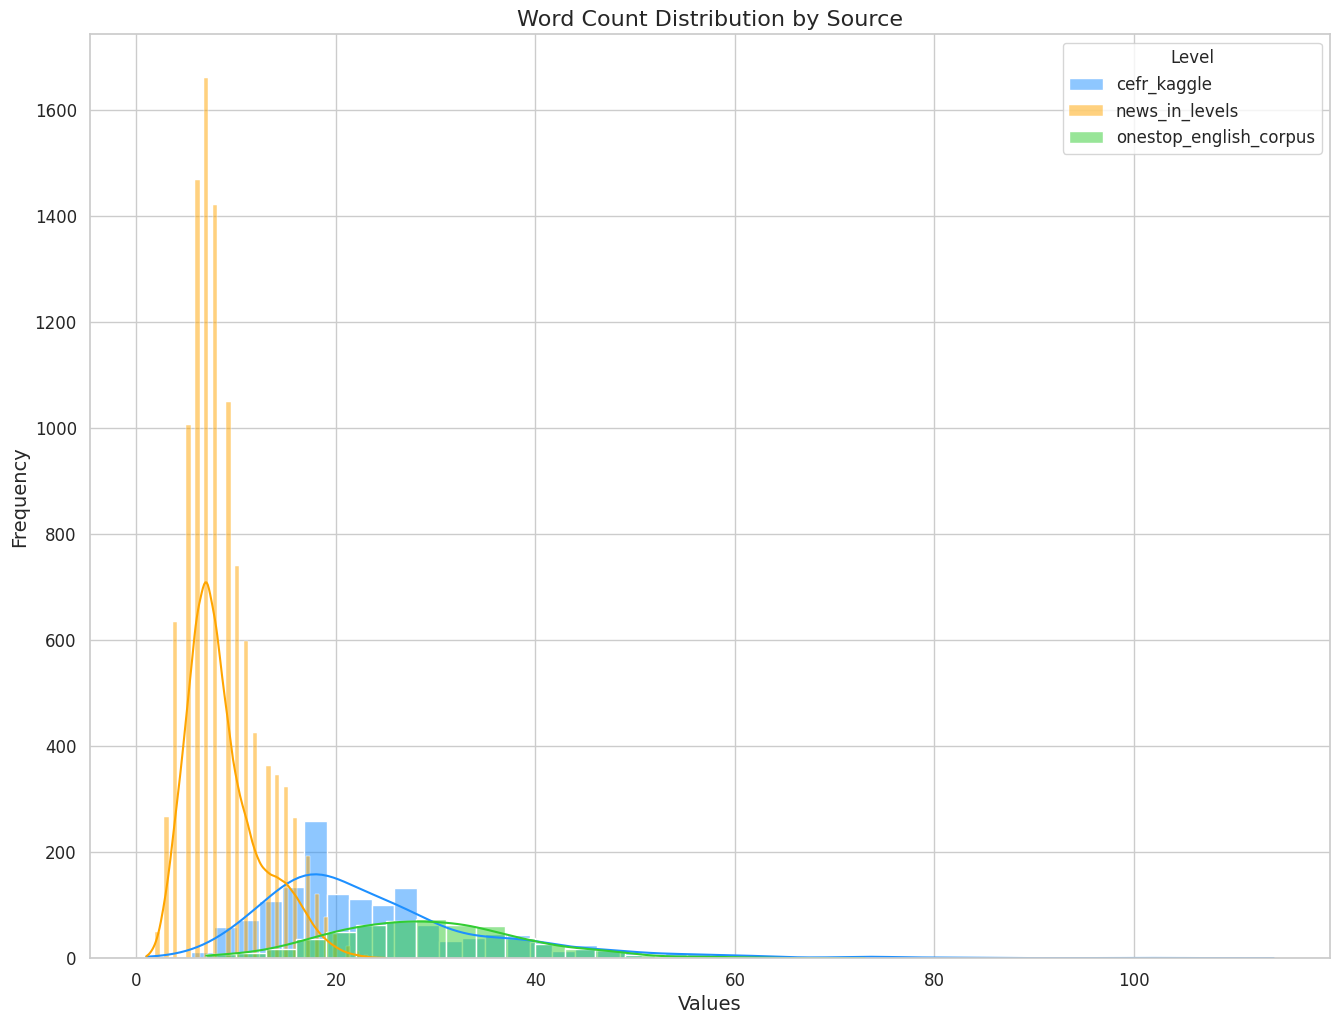

In [175]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"cefr_kaggle": "dodgerblue", "news_in_levels": "orange", "onestop_english_corpus": "limegreen"}

for source in df["source"].unique():
    sns.histplot(data=df[df["source"] == source], 
                 x="word_count", 
                 kde=True, 
                 label=source, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[source] )

# Customize the plot
ax.set_title("Word Count Distribution by Source", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Count Histogram by Language Levels

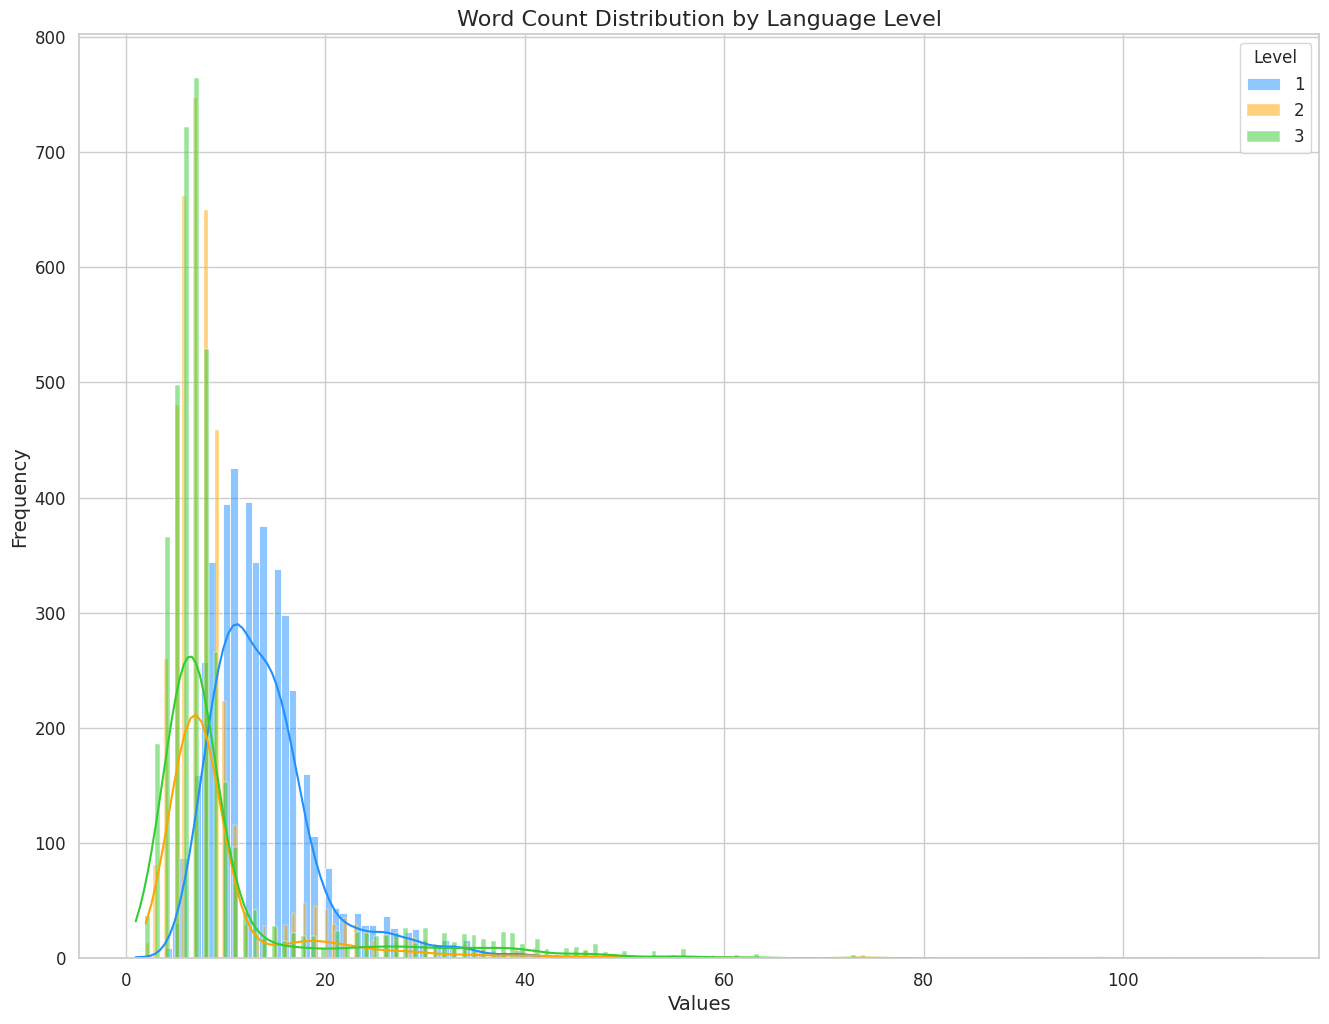

In [176]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {1: "dodgerblue", 2: "orange", 3: "limegreen"}

for level in [1,2,3]:
    sns.histplot(data=df[df["label"] == level], 
                 x="word_count", 
                 kde=True, 
                 label=level, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[level] )

# Customize the plot
ax.set_title("Word Count Distribution by Language Level", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Cloud by Language Level

Language Level 1


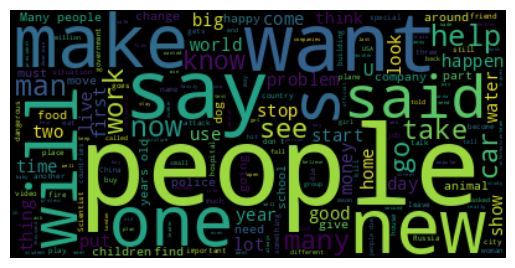

--------------------
Language Level 2


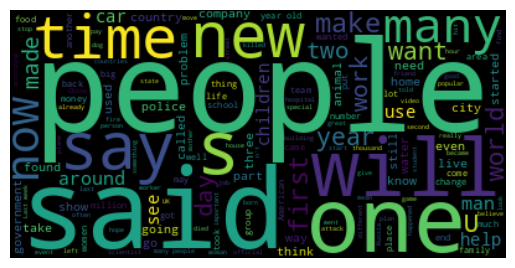

--------------------
Language Level 3


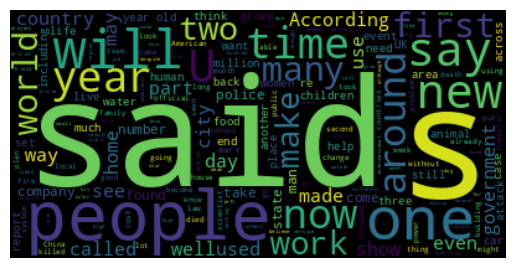

--------------------


In [177]:
from wordcloud import WordCloud

# Create a WordCloud for each level
for label in range(1, 4):
    print("Language Level {}".format(label))
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud().generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print("-"*20)

### Preprocessing

In [450]:
df_backup = df.copy()

In [451]:
df = df_backup.copy()

In [452]:
df["text"]

0      Hi!\nI've been meaning to write for ages and f...
1      ﻿It was not so much how hard people found the ...
2      Keith recently came back from a trip to Chicag...
3      The Griffith Observatory is a planetarium, and...
4      -LRB- The Hollywood Reporter -RRB- It's offici...
                             ...                        
562    ﻿In typical bad-boyfriend style, Dan Sullivan ...
563    ﻿Thousands of people protested on Australia’s ...
564    ﻿1 Race engineer  A race engineer liaises betw...
565    ﻿More than one million British workers might b...
566    ﻿Low-income countries will remain on the front...
Name: text, Length: 13158, dtype: object

In [453]:
import contractions
import re

def expand_contractions(text):
    """
    Expands contractions in the input text using the contractions library
    and regular expressions.
    
    Args:
        text (str): The input text with contractions.
    
    Returns:
        str: The input text with contractions expanded.
    """
    # Use the contractions library to expand the contraction
    text_expanded = contractions.fix(text)

    # Use a regular expression to expand the contraction
    text_expanded_re = re.sub(r'\b(\w+)\'(\w+)\b', r"\1'\2", text_expanded)
    
    # Return the expanded text
    return text_expanded_re

df["modified_text"] = df["text"].parallel_apply(lambda t: expand_contractions(t))

In [454]:
df["modified_text"] 

0      Hi!\nI have been meaning to write for ages and...
1      ﻿It was not so much how hard people found the ...
2      Keith recently came back from a trip to Chicag...
3      The Griffith Observatory is a planetarium, and...
4      -LRB- The Hollywood Reporter -RRB- It is offic...
                             ...                        
562    ﻿In typical bad-boyfriend style, Dan Sullivan ...
563    ﻿Thousands of people protested on Australia’s ...
564    ﻿1 Race engineer  A race engineer liaises betw...
565    ﻿More than one million British workers might b...
566    ﻿Low-income countries will remain on the front...
Name: modified_text, Length: 13158, dtype: object

In [455]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import string
import re

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    """
    Note: low-income -> low income
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Replace special characters with whitespace
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove leading and trailing whitespace
    text = text.strip()
    
    # Tokenize text into individual words
    words = nltk.word_tokenize(text)
    
    # Remove stopwords from the text
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Perform snowball stemming on the words
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    preprocessed_text = ' '.join(words)
    
    # Remove leading and trailing whitespace
    preprocessed_text = preprocessed_text.strip()
    
    
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [456]:
df["modified_text"] = df["modified_text"].parallel_apply(lambda t: preprocess_text(t))

In [457]:
df.modified_text

0      hi mean write age final today actual someth tr...
1      much hard peopl found challeng far would go av...
2      keith recent came back trip chicago illinoi mi...
3      griffith observatori planetarium exhibit hall ...
4      lrb hollywood report rrb offici amc walk dead ...
                             ...                        
562    typic bad boyfriend style dan sullivan late br...
563    thousand peopl protest australia beach shark c...
564    1 race engin race engin liais driver mechan ty...
565    one million british worker might employ zero h...
566    low incom countri remain front line human indu...
Name: modified_text, Length: 13158, dtype: object

#### Most Frequent Words after Preprocessing

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


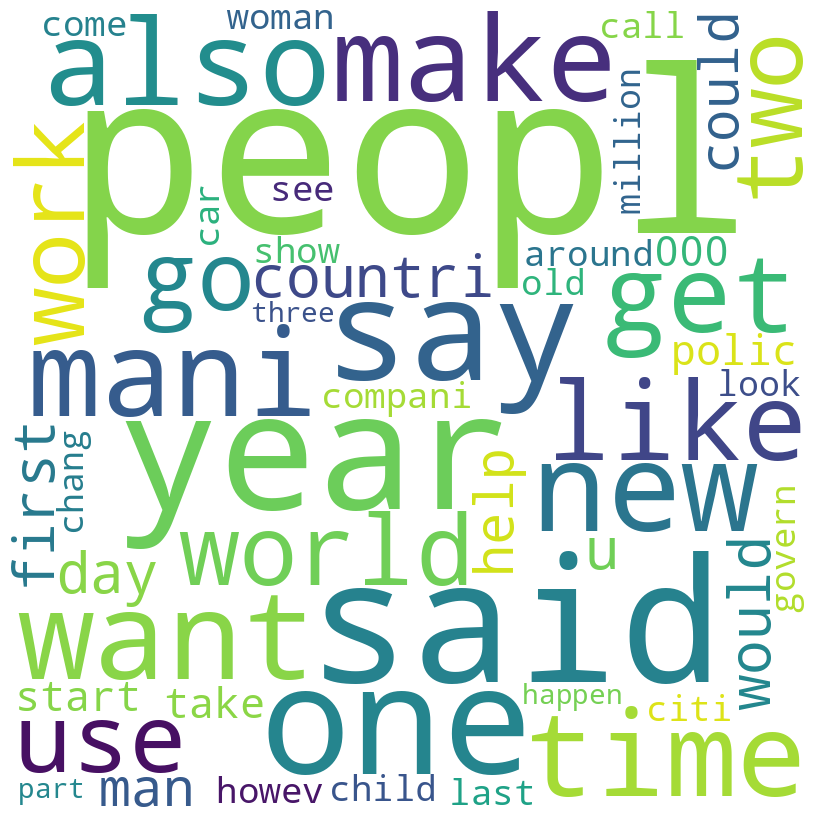

In [373]:
from collections import Counter

# Tokenize the preprocessed text into individual words
words = " ".join(df["modified_text"])
words = nltk.word_tokenize(words)

# Count the frequency of each word
word_freq = Counter(words)

# Create a WordCloud visualization of the most frequent words
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

### CountVectorizer

In [374]:
df.head()

,text,source,label,word_count,modified_text
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2,26,hi mean write age final today actual someth tr...
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2,34,much hard peopl found challeng far would go av...
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2,14,keith recent came back trip chicago illinoi mi...
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2,16,griffith observatori planetarium exhibit hall ...
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2,18,lrb hollywood report rrb offici amc walk dead ...


In [375]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize the text using CountVectorizer with n-grams in the range (1, 2)
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df['modified_text'])

y = df['label']

# Print the number of features created
print(f"Number of features created: {len(vectorizer.get_feature_names())}")

Number of features created: 26227


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [376]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LogisticRegression

In [377]:
# Train a Logistic Regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', 
                           solver='lbfgs', 
                           max_iter=15,
                           penalty = "l2",
                           random_state=42, 
                           n_jobs=num_processors-1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=15, multi_class='multinomial', n_jobs=3,
                   random_state=42)

In [378]:
y_pred_train = model.predict(X_train)

# Print the classification report
print("Classification report for Train Set")
print(classification_report(y_train, y_pred_train))

Classification report for Train Set
              precision    recall  f1-score   support

           1       0.88      0.89      0.88      3541
           2       0.80      0.78      0.79      3521
           3       0.87      0.88      0.87      3464

    accuracy                           0.85     10526
   macro avg       0.85      0.85      0.85     10526
weighted avg       0.85      0.85      0.85     10526



In [379]:
# Predict the labels on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification report for Test Set")
print(classification_report(y_test, y_pred))

Classification report for Test Set
              precision    recall  f1-score   support

           1       0.78      0.76      0.77       908
           2       0.57      0.56      0.57       857
           3       0.73      0.75      0.74       867

    accuracy                           0.70      2632
   macro avg       0.69      0.69      0.69      2632
weighted avg       0.70      0.70      0.70      2632



In [380]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[694 187  27]
 [160 484 213]
 [ 33 182 652]]


In [381]:
# Determine the most and least predictive words for each class
n_top = 10  # Number of top features to display
for i, label in enumerate(model.classes_):
    top_features = sorted(zip(model.coef_[i], vectorizer.get_feature_names()), reverse=True)[:n_top]
    bottom_features = sorted(zip(model.coef_[i], vectorizer.get_feature_names()))[:n_top]
    
    print(f"\nClass {label}:")
    print(f"Top {n_top} Positive Coefficient words: {[feature[1] for feature in top_features]}")
    print(f"Top {n_top} Negative Coefficient words: {[feature[1] for feature in bottom_features]}")


Class 1:
Top 10 most predictive words: ['news', 'dy', 'happen', 'fall', 'mom', 'lot', 'big', 'special', 'come', 'good']
Top 10 least predictive words: ['took', 'came', 'accord', 'becam', 'sinc', 'incid', 'local', 'design', 'caus', 'sever']


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Class 2:
Top 10 most predictive words: ['intermedi', 'took', 'becam', 'came', 'rrb', 'cnn', 'lrb', 'recent', 'impact', 'gave']
Top 10 least predictive words: ['dy', 'yes', 'win', 'footag', 'news', 'fall', 'spot', 'mom', 'dad', 'come']

Class 3:
Top 10 most predictive words: ['footag', 'accord', 'forc', 'resid', 'rescu', 'attempt', 'seen', 'claim', 'despit', 'sinc']
Top 10 least predictive words: ['intermedi', 'news', 'happen', 'problem', 'special', 'danger', 'big', 'possibl', 'money', 'usa']


**News Articles are dominating the predictions**

#### Combined Feature Importance

In [382]:
clf = model

feature_names = vectorizer.get_feature_names_out()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

In [383]:
coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
23660,took,-1.201908
4695,came,-1.159396
1602,accord,-0.905746
3412,becam,-0.851989
21465,sinc,-0.839112
11991,incid,-0.813305
14181,local,-0.734787
7129,design,-0.725612
4997,caus,-0.725406
21051,sever,-0.715838


In [384]:
import wordcloud

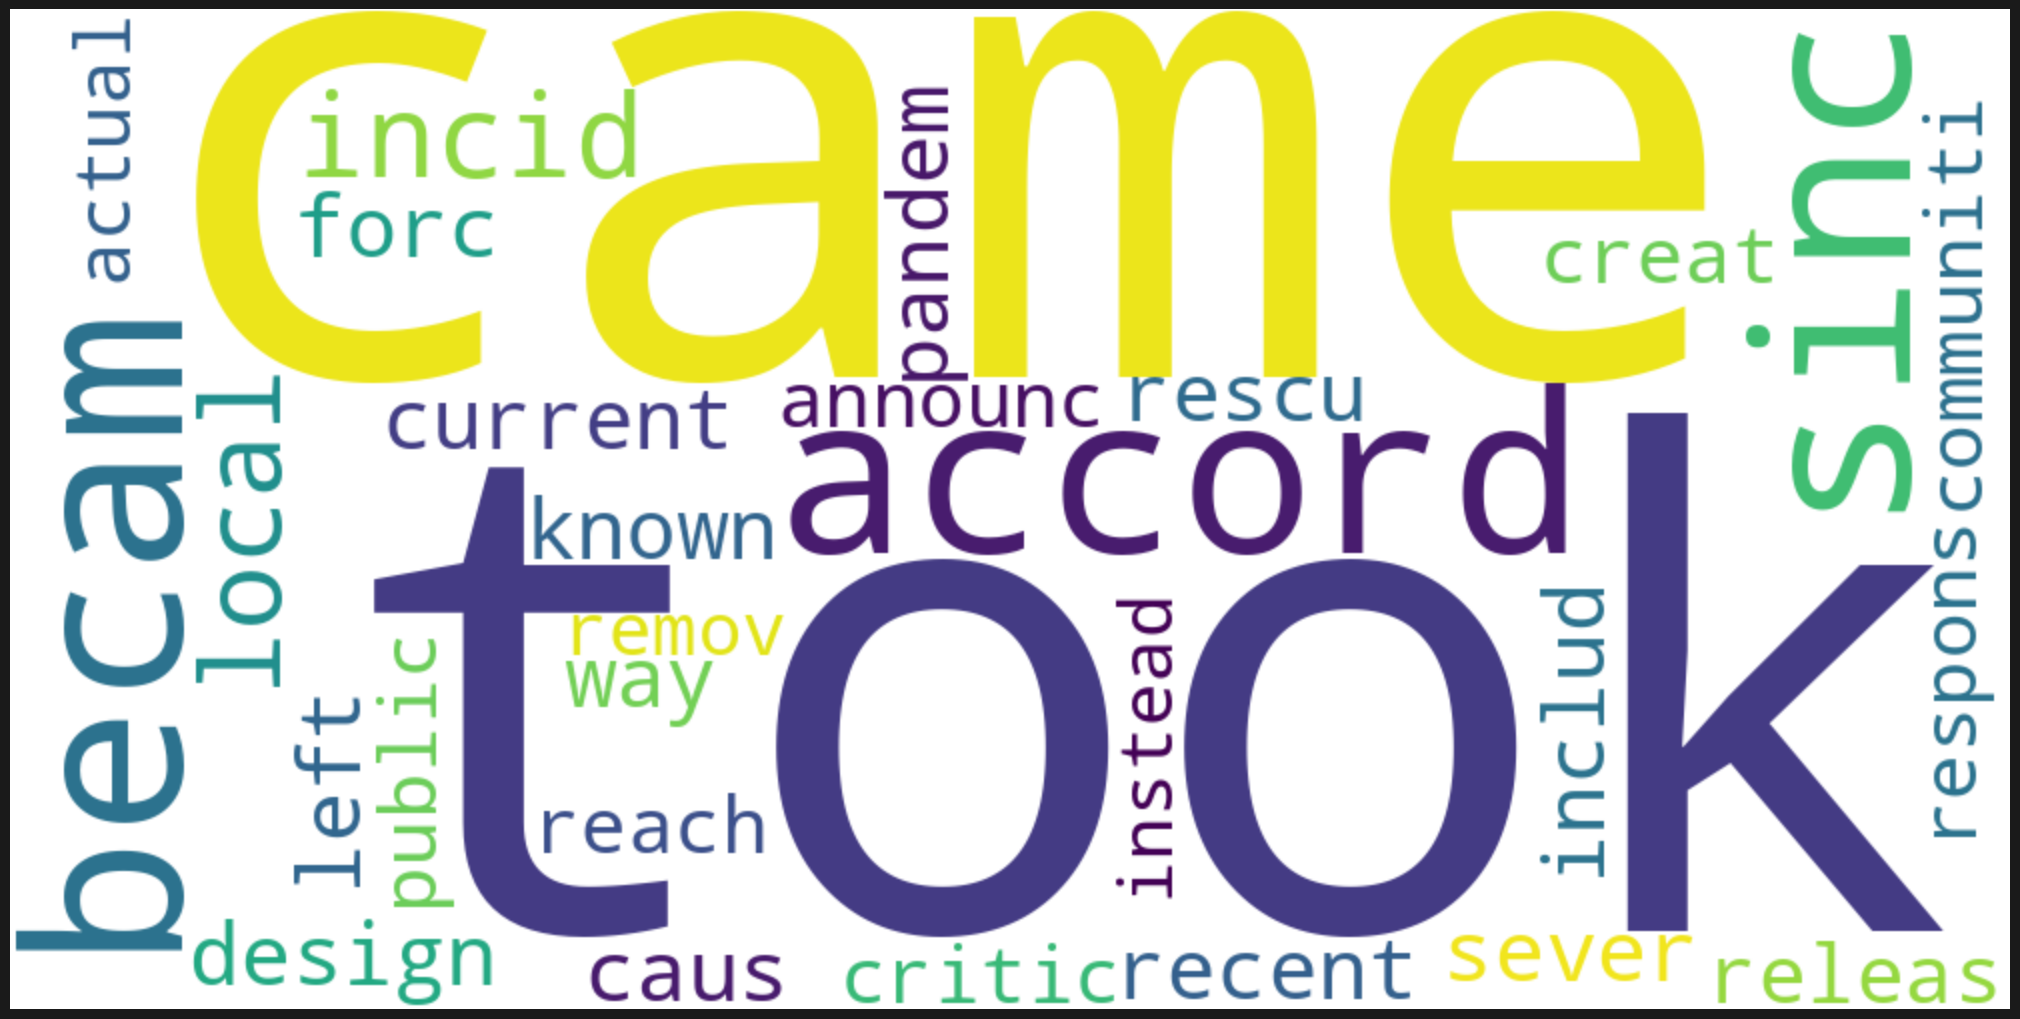

In [385]:
top_features_df = coefs_with_fns_df.copy()
top_features_df['coefficient'] = top_features_df['coefficient']*(-10)

data = dict(zip(top_features_df['feature'].tolist(), top_features_df['coefficient'].tolist()))


wordcloud_obj = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate_from_frequencies(data)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [386]:
coefs_with_fns_df.sort_values(by='coefficient', ascending=False, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
16396,news,1.389505
7893,dy,1.045129
10902,happen,0.875054
8873,fall,0.848930
15706,mom,0.787351
14287,lot,0.715528
3684,big,0.645541
21989,special,0.607545
5837,come,0.604066
10299,good,0.584272


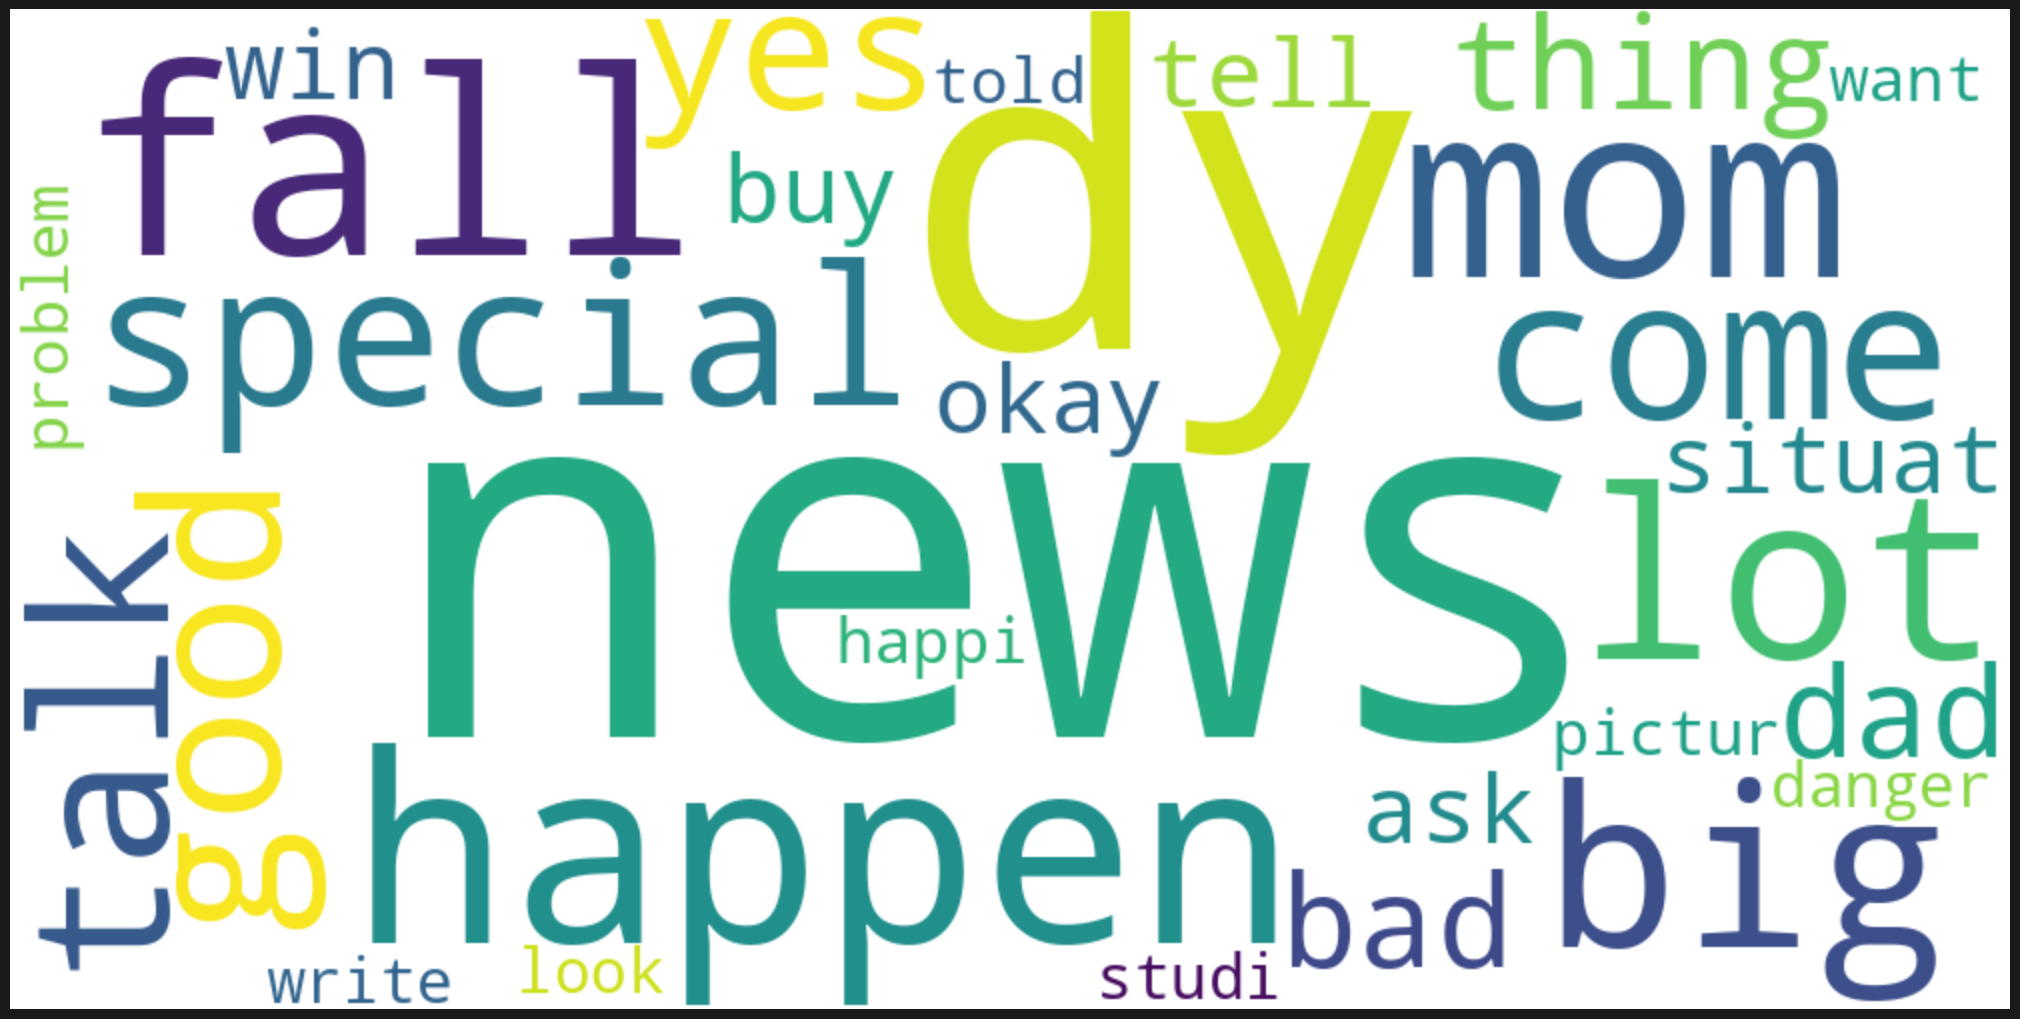

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [387]:
top_features_df = coefs_with_fns_df
top_features_df['coefficient'] = top_features_df['coefficient']*(10)

data = dict(zip(top_features_df['feature'].tolist(), top_features_df['coefficient'].tolist()))


wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate_from_frequencies(data)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### NaiveBayesClassifier

In [390]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes model for multi-class classification
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [391]:
y_pred_train = model.predict(X_train)

# Print the classification report
print("Classification report for Train Set")
print(classification_report(y_train, y_pred_train))

Classification report for Train Set
              precision    recall  f1-score   support

           1       0.74      0.95      0.83      3541
           2       0.69      0.63      0.66      3521
           3       0.89      0.72      0.80      3464

    accuracy                           0.76     10526
   macro avg       0.77      0.76      0.76     10526
weighted avg       0.77      0.76      0.76     10526



In [392]:
# Predict the labels on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification report for Test Set")
print(classification_report(y_test, y_pred))

Classification report for Test Set
              precision    recall  f1-score   support

           1       0.63      0.80      0.71       908
           2       0.38      0.38      0.38       857
           3       0.73      0.54      0.62       867

    accuracy                           0.58      2632
   macro avg       0.58      0.57      0.57      2632
weighted avg       0.59      0.58      0.57      2632



In [380]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[694 187  27]
 [160 484 213]
 [ 33 182 652]]


### BERTClassifier

In [466]:
%pip install ktrain==0.33.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 10.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.0-py3-none-any.whl size=25313815 sha256=f411978cd0ca921763491a084d125e144e705bc83498e74827a2339acd73b2eb
  Stored in directory: /home/jupyter/.cache/pip/wheels/cb/c2/1a/db7e1066fb4a94becc327ec359a493a8899089609d55698133
Successfully built ktrain
  Attempting uninstall: ktrain
    Found existing installation: ktrain 0.36.0
    Uninstalling ktrain-0.36.0:
      Successfully uninstalled ktrain-0.36.0
Note: you may need to restart the kernel to use updated packages.


In [467]:
df

/opt/conda/lib/python3.7/site-packages/ktrain/imports.py:59: UserWarning: TensorFlow is not installed and will be needed if training neural networks, but non-TensorFlow features in ktrain can still be used. See https://github.com/amaiya/ktrain/blob/master/README.md
  warnings.warn(TF_WARNING)


,text,label
0,hiive meaning write age finally today im actua...,1
1,much hard people found challenge far would go ...,1
2,keith recently came back trip chicago illinois...,1
3,griffith observatory planetarium exhibit hall ...,1
4,lrb hollywood reporter rrb official amcs walki...,1
...,...,...
13153,typical badboyfriend style dan sullivan late b...,2
13154,thousand people protested australia beach shar...,2
13155,1 race engineer race engineer liaises driver m...,2
13156,one million british worker might employed zero...,2


In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [6]:
import ktrain
from ktrain import text

AttributeError: 'NoneType' object has no attribute '__version__'

In [4]:
import pandas as pd

# Load the data
df = pd.read_csv('data/train_data.csv')
df = df[['text', 'label']]

In [5]:
df["label"] = df["label"] - 1  # change the label to 0, 1, 2

In [8]:
# import ktrain
from ktrain import text

# Split the data
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(train_df=df,
                                                                   text_column='text',
                                                                   label_columns=['label'],
                                                                   val_pct=0.2,
                                                                   maxlen=350,
                                                                   max_features=35000,
                                                                   preprocess_mode='bert')

AttributeError: 'NoneType' object has no attribute '__version__'

In [ ]:
# Create the model
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)

# Train the model
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

learner.fit_onecycle(lr=2e-5, epochs=1, verbose=1)

# Save the model
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
# Evaluation
y_pred = predictor.predict(x_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=preproc.get_classes(),
            yticklabels=preproc.get_classes())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')